In [1]:
# For Word2Vec
import gensim 
from gensim import corpora
from gensim import models
from gensim import similarities
from gensim.models.doc2vec import Doc2Vec

# For text preprocessing
import nltk
from nltk.corpus import stopwords
import string
from string import digits

# Generics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import json
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import multiprocessing

In [2]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
stop_words = stopwords.words('english')

In [3]:
def preprocess_word(word):
    """
    INPUT : String
    OUTPUT: String lemmatized
    Apply standard cleaning operations of strings like:
    - Lemmatization
    - Stemming
    """
    word = lemmatizer.lemmatize(word)
    return stemmer.stem(word)

def preprocess_doc(document):
    
    """
    INPUT : String
    OUTPUT: List of strings 
    Apply standard cleaning operations to each of the words
    and return a list of the cleaned words
    """
    document = document.lower().translate(str.maketrans(' ', ' ', string.punctuation)).split()
    return [preprocess_word(x)  for x in document if x not in stop_words]

        
def getvector(query):
    """
    INPUT: String
    OUTUT: np.array containing the embeddings for query
    """
    # Parse the query
    return model.infer_vector(preprocess_doc(query))
        
def query(query, n_results=5):
    """
    INPUT: String to query, numbers of docs to retireve
    OUTUT: Dataframe containing the n most similar docs to the query
    """
    
    # Parse the query
    query_preprocessed = getvector(query) 
    
    # Get matches
    results = pd.DataFrame( model.docvecs.most_similar([query_preprocessed], topn=n_results), columns=['doc_ID', 'distance']) 
    
    # Match query results with original df
    get_ids = df.loc[results['doc_ID'].tolist()]
    # Add distances to dataframe
    get_ids['distance'] = results['distance'].tolist()        
    return get_ids[['Name','Plot','distance']]

def describe_movie(index_film):
    """
    Pretty print a movie given its index/wiki_id
    """
    L = list(df.loc[index_film])
    #print('{:>12}  {:>12}  {:>50}'.format(L[2], L[3], L[1]))
    print("TITLE: " + L[2]  + "\n" + "GENRE: " + L[3]  + "\n" + " PLOT: " + L[1]  + "\n")
    

def get_neighbours(df, index_film, n_movies , seed=1):
    """
    INPUT:  A dataframe and the index of the for which we want to inspect the neighbours
    OUTPUT: A dataframe that contains the closest n-movies to the film at position index_film
    """
    if (df.loc[index_film].any()):
        L = list(df.loc[index_film])
    else:
        print("Error")
        

    # Plot is in position 1 of the retrieved list of the row
    reference_plot = L[1]
    
    # I query the plot of the indexed film
    return query(reference_plot, n_results=n_movies)
    

def get_movies_from_title(df, title):
    """
    Utility function that facilitate the retrieval of
    a movie index from the title
    """
    return df[df['Name'].str.contains(title, regex=False,case=False)]

#### Read the preprocessed DF

In [4]:
path   = "./preprocessed/"
df     = pd.read_pickle(path+"df_preprocessed.pkl")
df.head(5)

,Wiki_ID,Plot,Name,genres,len,Corpus,genres_all
0,0,The nation of Panem consists of a wealthy Capi...,The Hunger Games,Action/Adventure,4559,"[nation, panem, consist, wealthi, capitol, twe...","[Action/Adventure, Science Fiction, Action, Dr..."
1,1,Poovalli Induchoodan is sentenced for six yea...,Narasimham,Musical,3099,"[pooval, induchoodan, sentenc, six, year, pris...","[Musical, Action, Drama, Bollywood]"
2,2,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,Screwball comedy,4917,"[lemon, drop, kid, new, york, citi, swindler, ...","[Screwball comedy, Comedy]"
3,3,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,Crime Fiction,2425,"[seventhday, adventist, church, pastor, michae...","[Crime Fiction, Drama, Docudrama, World cinema..."
4,4,The president is on his way to give a speech. ...,End Game,Thriller,1937,"[presid, way, give, speech, travel, man, show,...","[Thriller, Action/Adventure, Action, Drama]"


#### Load the model

In [5]:
model = Doc2Vec.load("./models/doc2vec_100_Movies")

#### Query a sentence

In [6]:
Q = " competition sport war   "
query(Q,3)

,Name,Plot,distance
14752,Silent Night,"A German mother , who had already lost her eld...",0.572994
9178,Everyman's War,As the seasoned infantry and tank units of the...,0.517124
10029,The Young Lions,= German ski instructor Christian Diestl is ho...,0.502903


#### Investigate the movie retrieved

In [7]:
describe_movie(10029)

TITLE: The Young Lions
GENRE: Period piece
 PLOT: = German ski instructor Christian Diestl is hopeful that Adolf Hitler will bring new prosperity to Germany, so when war breaks out he joins the army as a lieutenant. Dissatisfied with police duty in Paris, he requests to be transferred and is assigned to the front in North Africa. He sees what the war has done to his captain  and the captain's wife , and he is sickened by their behavior. Michael Whiteacre and Noah Ackerman befriend each other during their U.S. Army draft physical examination and attend basic training together. They are then stationed in London. Michael is in show business and romantically involved with socialite Margaret Freemantle  who, coincidentally, in 1938 dated Christian in the Bavarian Alps when she went on a skiing vacation. She was upset by his Nazi beliefs and deserted him on New Year's Eve to return to Michael. Noah, who is Jewish and works as a lowly department store clerk, attends a party Michael throws, wh

# Querying

## Retrieve the "lord of the rings" movies

In [8]:
get_movies_from_title(df,"lord of the rings")

,Wiki_ID,Plot,Name,genres,len,Corpus,genres_all
7252,7252,"In the Second Age, the Dark Lord Sauron attem...",The Lord of the Rings: The Fellowship of the Ring,Fantasy Adventure,4426,"[second, age, dark, lord, sauron, attempt, con...","[Fantasy Adventure, Adventure, Epic, Fantasy, ..."
8246,8246,"Early in the Second Age of Middle-earth, elven...",The Lord of the Rings,Fantasy Adventure,4451,"[earli, second, age, middleearth, elven, smith...","[Fantasy Adventure, Sword and sorcery films, A..."
20183,20183,Gandalf the Grey gives his life in battle agai...,The Lord of the Rings: The Two Towers,Fantasy Adventure,5079,"[gandalf, grey, give, life, battl, balrog, giv...","[Fantasy Adventure, Adventure, Epic, Action/Ad..."
20906,20906,"Gandalf, Aragorn, Legolas, Gimli, Théoden, Ga...",The Lord of the Rings: The Return of the King,Fantasy Adventure,4166,"[gandalf, aragorn, legola, gimli, théoden, gam...","[Fantasy Adventure, Adventure, Epic, Action/Ad..."


In [9]:
get_neighbours(df, 7252, 5)

,Name,Plot,distance
7252,The Lord of the Rings: The Fellowship of the Ring,"In the Second Age, the Dark Lord Sauron attem...",0.989790
20183,The Lord of the Rings: The Two Towers,Gandalf the Grey gives his life in battle agai...,0.851608
8246,The Lord of the Rings,"Early in the Second Age of Middle-earth, elven...",0.786040
20906,The Lord of the Rings: The Return of the King,"Gandalf, Aragorn, Legolas, Gimli, Théoden, Ga...",0.745923
9559,The Hunt for Gollum,The film is set during the timespan of The Fel...,0.695621


## Retrieve the "star wars" movies

In [10]:
get_movies_from_title(df,"star wars")

,Wiki_ID,Plot,Name,genres,len,Corpus,genres_all
1876,1876,The film begins with an opening crawl explain...,Star Wars Episode V: The Empire Strikes Back,Science Fiction,4653,"[film, begin, open, crawl, explain, three, yea...","[Science Fiction, Adventure, Space opera, Fant..."
3935,3935,The Galactic Republic is in turmoil. Followin...,Star Wars Episode II: Attack of the Clones,Science Fiction,4299,"[galact, republ, turmoil, follow, invas, naboo...","[Science Fiction, Adventure, Space opera, Fant..."
4176,4176,The film begins with an opening crawl explain...,Star Wars Episode IV: A New Hope,Science Fiction,3556,"[film, begin, open, crawl, explain, galaxi, st...","[Science Fiction, Adventure, Fantasy, Coming o..."
6402,6402,The plot loosely follows that of the original...,Lego Star Wars: Bombad Bounty,Short Film,4334,"[plot, loos, follow, origin, trilog, part, 1, ...","[Short Film, Science Fiction, Comedy, Animation]"
9312,9312,"It is Life Day . Chewbacca, accompanied by Han...",The Star Wars Holiday Special,Science Fiction,5220,"[life, day, chewbacca, accompani, han, solo, h...","[Science Fiction, Adventure, Holiday Film, Ani..."
10934,10934,The operational conditions on the boundless op...,Star Wars: Storm in the Glass,Parody,2277,"[oper, condit, boundless, open, space, farnort...","[Parody, Science Fiction, Adventure, Comedy]"
11932,11932,The Galactic Republic is in a period of decli...,Star Wars Episode I: The Phantom Menace,Science Fiction,4333,"[galact, republ, period, declin, respons, taxa...","[Science Fiction, Action, Fantasy, Adventure, ..."
13634,13634,"As the Clone Wars rage on, the Galactic Repub...",Star Wars Episode III: Revenge of the Sith,Science Fiction,3869,"[clone, war, rage, galact, republ, suffer, maj...","[Science Fiction, Action, Fantasy, Tragedy, Ad..."
15779,15779,Luke Skywalker initiates a plan to rescue Han...,Star Wars Episode VI: Return of the Jedi,Science Fiction,4158,"[luke, skywalk, initi, plan, rescu, han, solo,...","[Science Fiction, Adventure, Space opera, Fant..."
16923,16923,The Separatists control the majority of the hy...,Star Wars: The Clone Wars,Thriller,4628,"[separatist, control, major, hyperlan, leav, r...","[Thriller, Science Fiction, Adventure, Compute..."


In [11]:
get_neighbours(df, 3935, 5) 

,Name,Plot,distance
3935,Star Wars Episode II: Attack of the Clones,The Galactic Republic is in turmoil. Followin...,0.985678
11932,Star Wars Episode I: The Phantom Menace,The Galactic Republic is in a period of decli...,0.693283
13634,Star Wars Episode III: Revenge of the Sith,"As the Clone Wars rage on, the Galactic Repub...",0.647050
16923,Star Wars: The Clone Wars,The Separatists control the majority of the hy...,0.632883
1876,Star Wars Episode V: The Empire Strikes Back,The film begins with an opening crawl explain...,0.585389


## Retrieve the "Mary Poppins" movie

In [12]:
get_movies_from_title(df,"Mary Poppins")

,Wiki_ID,Plot,Name,genres,len,Corpus,genres_all
8226,8226,The film opens with Mary Poppins perched in a...,Mary Poppins,Children's/Family,8411,"[film, open, mari, poppin, perch, cloud, high,...","[Children's/Family, Musical, Fantasy, Comedy, ..."


In [13]:
get_neighbours(df, 8226, 5) 

,Name,Plot,distance
8226,Mary Poppins,The film opens with Mary Poppins perched in a...,0.993000
5341,The Toy that Saved Christmas,Grandpa George tells a story about Wally P. Ne...,0.545654
6227,Nanny McPhee,"{{plot}} In 19th century England, widowed Ced...",0.490865
12130,A Charlie Brown Christmas,On their way to join the rest of the Peanuts g...,0.489622
15699,The Bishop's Wife,Bishop Henry Brougham prays for divine guidan...,0.484037


## Visualization:
#### Not as good as I was expecting

In [16]:

def standard_scaler(x):
    """
    A simple min-max scaler
    """
    mn, ptp = x.min(), x.ptp()
    return (x - mn) / ptp

def get_representation2D(df, n_movies,tsne, seed=1):
    """
    INPUT: dataframe, number of movies to be visualize, an tsne sklearn model
    OUTPUT: Dataframe containing the 2d representation of the movies passed
    tsne representation is from: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
    Here n_movies are randomly sampled and their coordinates on a 2D projection is calculated
    """
    temp = df.sample(n=n_movies, random_state=seed)  
    temp['embeddings'] = [getvector(doc) for doc in temp['Plot'].tolist()]
    
    
    temp_SNE = tsne.fit_transform(temp['embeddings'].tolist()).transpose()

    temp['x'] = standard_scaler(temp_SNE).tolist()[0]
    temp['y'] = standard_scaler(temp_SNE).tolist()[1]
    
    return temp


def plot_representation2D(df):
    
    # Style
    sns.set_context("talk")
    plt.figure(figsize=(20,20))
    
    # Plot the datapoints
    p1 = sns.scatterplot(data = df, x = "x", y = "y", hue = "genres",   s = 300);
    
    
    # Code to annotate the plot with labels
    labels = ["  "+name + ":\n   " + genre for name,genre in zip(df['Name'].tolist(), df['genres'].tolist())]
    # Add text besides each point
    for x,y,g in zip(df['x'].tolist(), df['y'].tolist(),labels):
         p1.text(x+0.01,
                 y,
                 g,
                 horizontalalignment='left',
                 size='large', color='black', weight='book')
    # place the legend outside the figure/plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
    
    
    # Customize the figure and plot
    plt.tight_layout()
    plt.show()


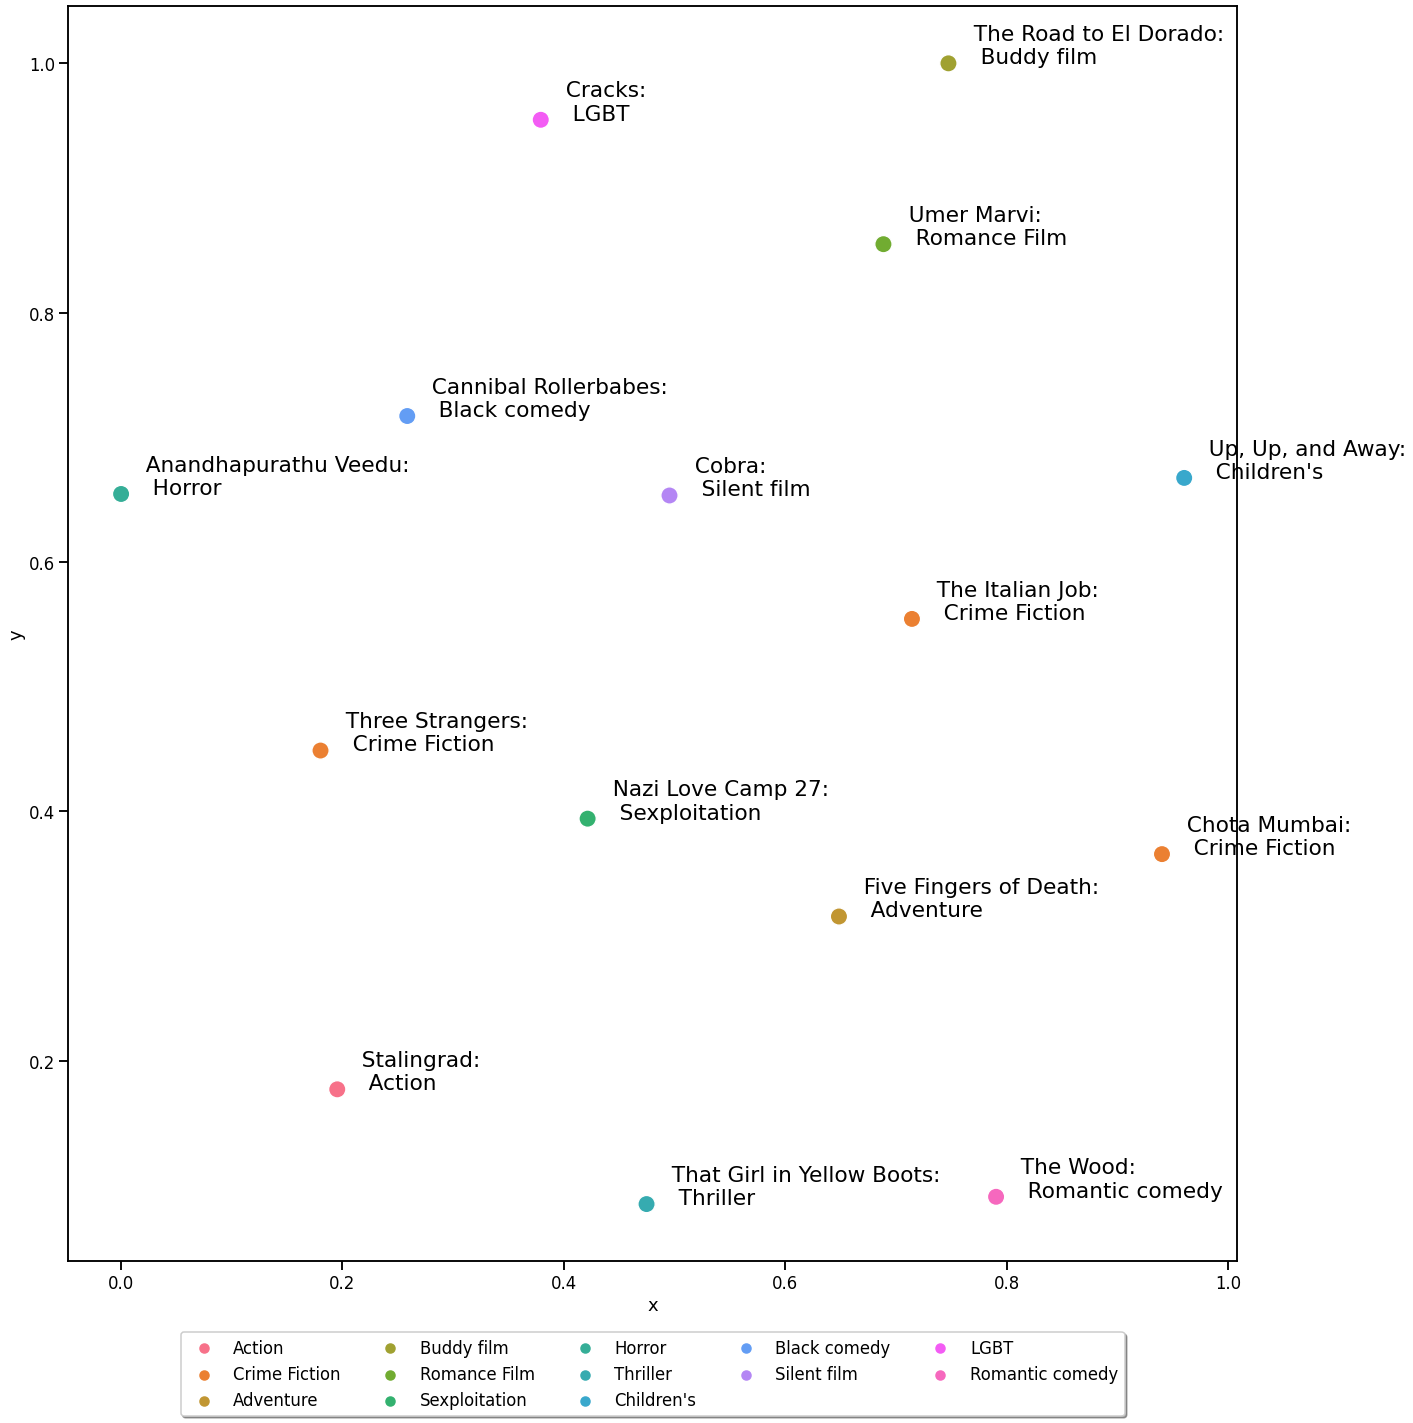

In [18]:
n_movies=15
tsne = TSNE(n_components=2)
plot_representation2D(get_representation2D(df, n_movies,tsne, seed=12))